In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

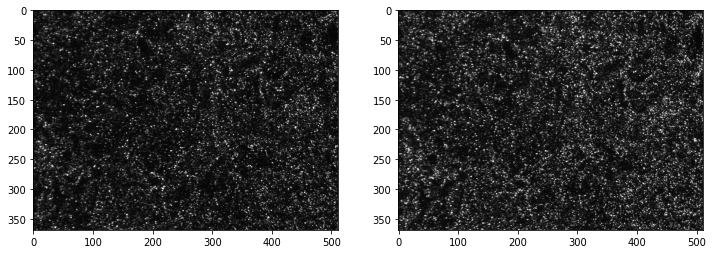

In [6]:
import imageio


frame_a = tools.imread('./openpiv/data/test1/exp1_001_a.bmp')
frame_b = tools.imread('./openpiv/data/test1/exp1_001_b.bmp')

fig, ax = plt.subplots(1, 2, figsize = (12, 10))
ax[0].imshow(frame_a, cmap = plt.cm.gray)
ax[1].imshow(frame_b, cmap = plt.cm.gray)



In [7]:
winsize = 32 # pixels: the interrogation window size in frame a
searchsize = 38 # pixels: search area size in frame b
overlap = 17 # pixels, 50% overlap
dt = 0.02 # sec: time interval between two frames

u0, v0, sig2noise = pyprocess.extended_search_area_piv(
    frame_a.astype(np.int32),
    frame_b.astype(np.int32),
    window_size = winsize,
    overlap = overlap,
    dt = dt,
    search_area_size = searchsize,
    sig2noise_method = 'peak2peak'
)

In [8]:
x, y = pyprocess.get_coordinates(
    image_size = frame_a.shape,
    search_area_size = searchsize, 
    overlap = overlap
) # get_coordinates() finds the center of each interrogation window, which is useful later,
# when plotting the vector field.

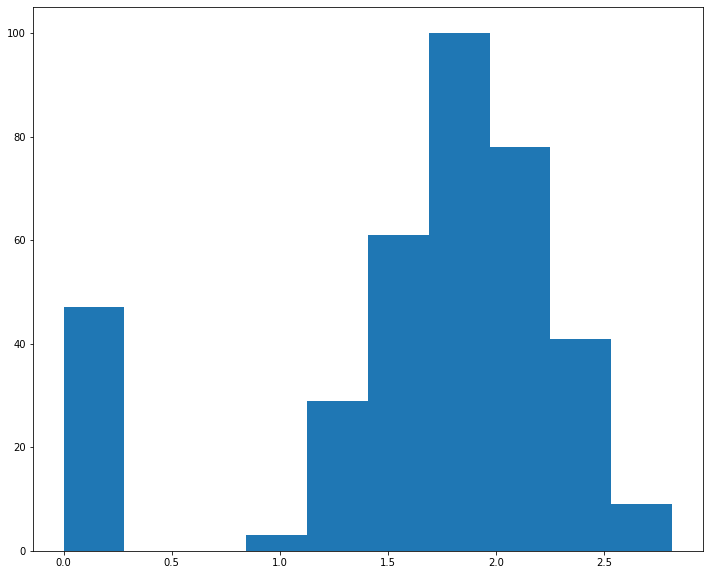

In [10]:
u1, v1, mask = validation.sig2noise_val(
    u0, v0,
    sig2noise,
    threshold = 1.05
) # Mask poorly-determined velocities by SNR threshold

# you can find a good-looking threshold with:
plt.hist(sig2noise.flatten())
# See how there's a cluster of totally whiffed SNR at 

u2, v2, = filters.replace_outliers(
    u1, v1, 
    method = 'localmean',
    max_iter = 3,
    kernel_size = 3
)
